# CLS study

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Construction of the keras model

In [17]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Input
from tensorflow.keras import optimizers

In [18]:
def visu_perf_model(history: tensorflow.keras.callbacks.History,
                    title: str,
                    ):
    """

    :param history: history of the training
    :param title: sup title for the training graph
    :return:
    """
    # Get training and test loss histories
    training_loss = history.history["loss"]
    test_loss = history.history["val_loss"]
    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # --> visualisation of the loss
    ax1.plot(epoch_count, training_loss, "r--")
    ax1.plot(epoch_count, test_loss, "b-")
    ax1.legend(["Training Loss", "Test Loss"])
    ax1.set(xlabel="Epoch", ylabel="Loss")
    ax1.set_title("LOSS VISU")

    # --> visualisation of the accuracy
    training_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]

    ax2.plot(epoch_count, training_accuracy, "r--")
    ax2.plot(epoch_count, test_accuracy, "b-")
    # Visualize accuracy history
    ax2.legend(["Training Accuracy", "Test Accuracy"])
    ax2.set(xlabel="Epoch", ylabel="Accuracy")
    ax2.set_title("ACC VISU")

    a = test_accuracy[-1]  # last value

    plt.suptitle(title)

    return fig, a

In [19]:
def class_head(x_train, y_train,
               x_test, y_test,
               title: str,
               lr: float = 0.001,
               vb: int = 0,
               n: int = 30,
               tp: str = "XML"):
    # creation of the model

    model = Sequential()
    model.add(Input(shape=(768,)))

    if tp == "RoBERTa":
        # roberta class Head : 1 layer with tanh act
        #                      and 1 dropout with a probability of 0.1
        model.add(Dense(units=768, activation="tanh"))
        model.add(Dropout(0.1))

    model.add(Dense(units=1))

    # dropout just before the activation function.
    # this is the way the head is constructed in all the models.
    model.add(Dropout(0.1))
    model.add(Activation(sigmoid))

    opt = optimizers.Adam(learning_rate=lr)

    model.compile(loss="binary_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])

    #model.summary()

    history = model.fit(x_train,
                        y_train,
                        epochs=n,
                        verbose=vb,
                        batch_size=32,
                        validation_data=(x_test, y_test),
                        )

    fig, acc = visu_perf_model(history, title)

    return model, fig, acc

## The study

In [20]:
# the treillis we will plot as a color matrix
treillis = np.zeros((4, 5))

### FlauBERT (RAW)

In [21]:
# load the data for the raw flaubert
with open('numpy_save/flaubert_raw.npy', 'rb') as f:
    train_array_5 = np.load(f)
    train_array_7 = np.load(f)
    train_array_9 = np.load(f)
    train_array_11 = np.load(f)
    train_array_12 = np.load(f)

    test_array_5 = np.load(f)
    test_array_7 = np.load(f)
    test_array_9 = np.load(f)
    test_array_11 = np.load(f)
    test_array_12 = np.load(f)

    train_label = np.load(f)
    test_label = np.load(f)

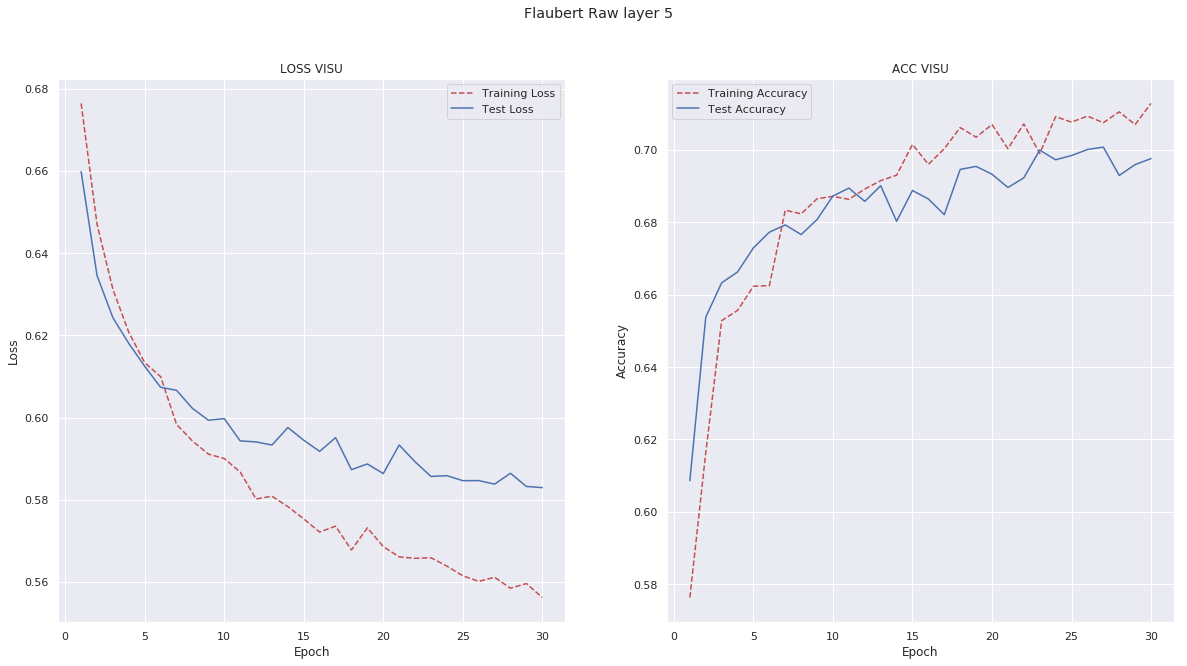

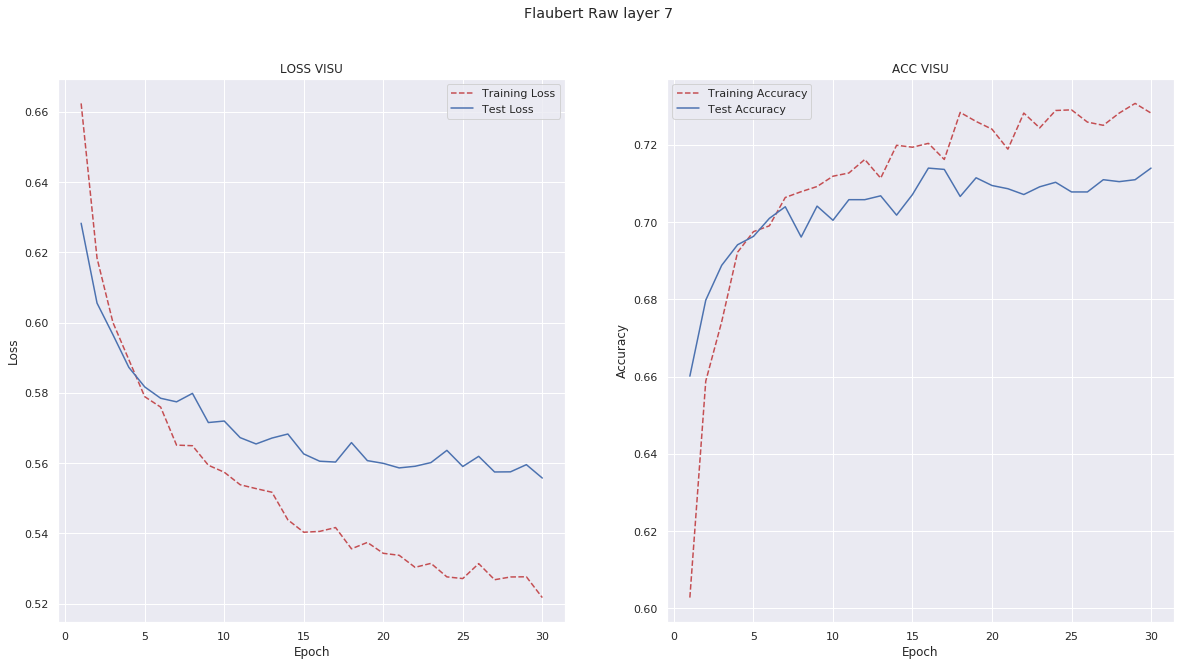

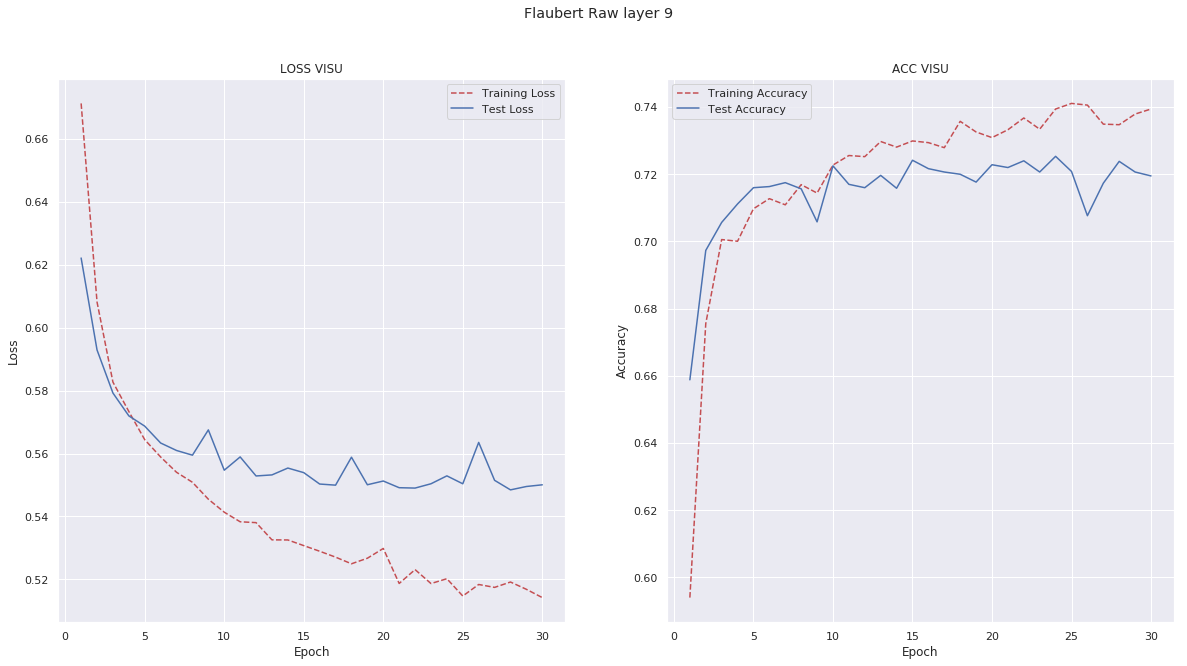

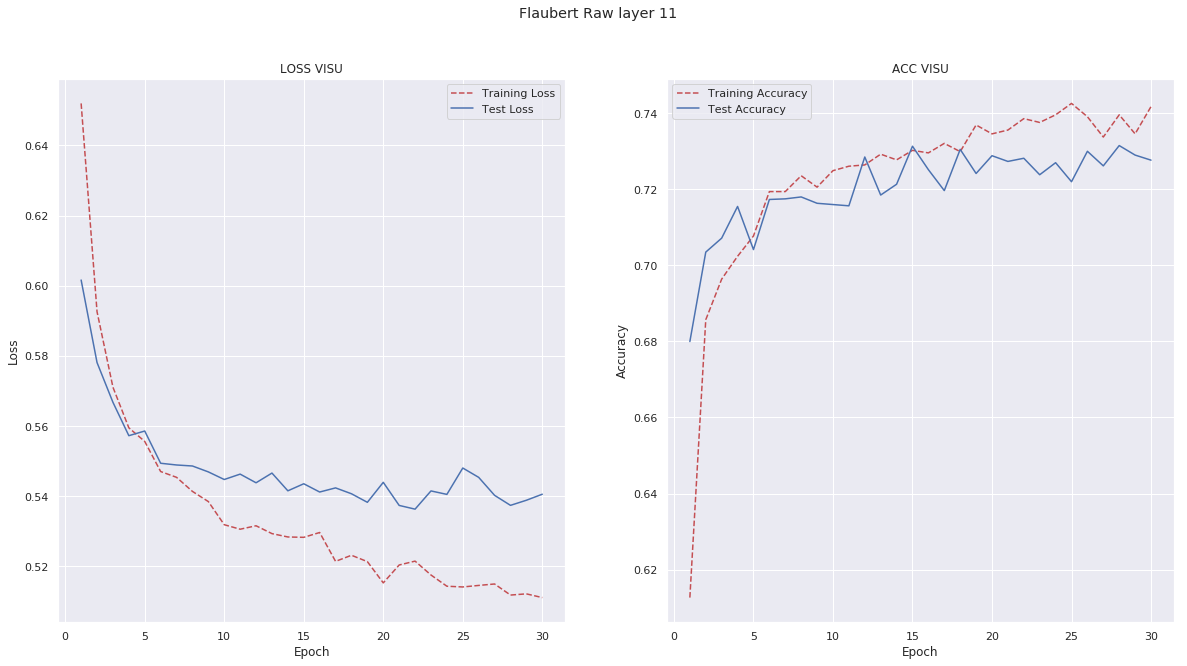

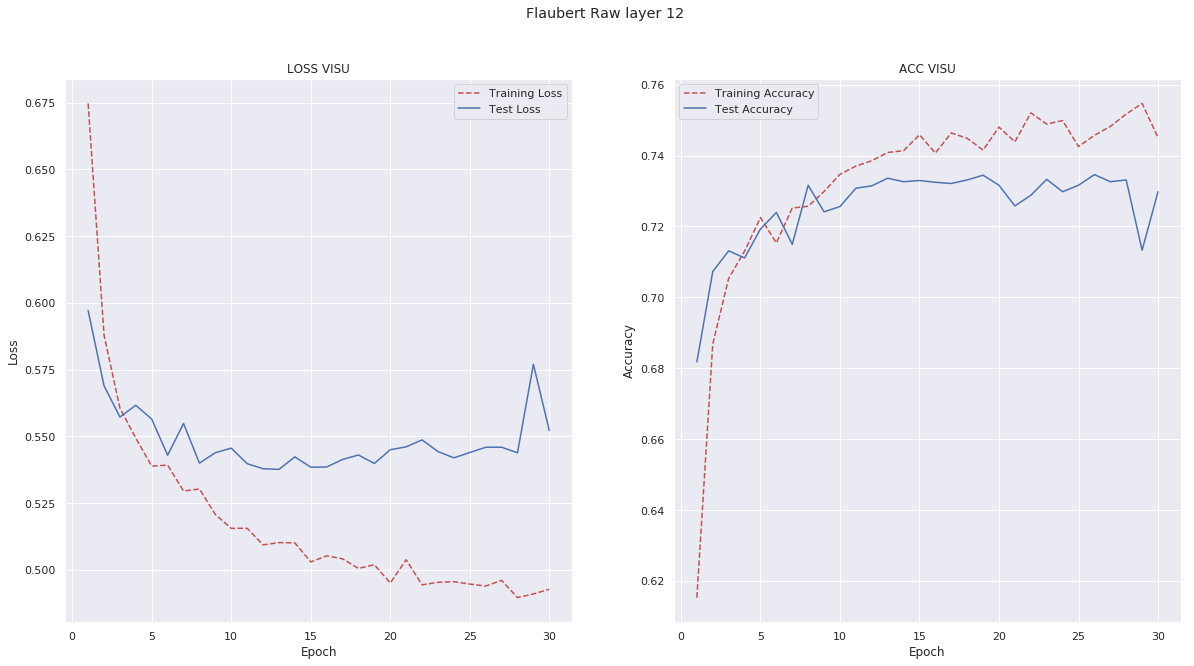

In [22]:
# models creations
model_fl_r_5, fig_5, acc_5 = class_head(x_train=train_array_5, y_train=train_label, x_test=test_array_5,
                                        y_test=test_label, title="Flaubert Raw layer 5")
plt.show()

model_fl_r_7, fig_7, acc_7 = class_head(train_array_7, train_label, test_array_7, test_label,
                                        title="Flaubert Raw layer 7")
plt.show()
model_fl_r_9, fig_9, acc_9 = class_head(train_array_9, train_label, test_array_9, test_label,
                                        title="Flaubert Raw layer 9")
plt.show()
model_fl_r_11, fig_11, acc_11 = class_head(train_array_11, train_label, test_array_11, test_label,
                                           title="Flaubert Raw layer 11")
plt.show()
model_fl_r_12, fig_12, acc_12 = class_head(train_array_12, train_label, test_array_12, test_label,
                                           title="Flaubert Raw layer 12")
plt.show()

treillis[0, 0] = acc_5
treillis[0, 1] = acc_7
treillis[0, 2] = acc_9
treillis[0, 3] = acc_11
treillis[0, 4] = acc_12

### FlauBERT (fine-tuned)

In [23]:
with open('numpy_save/flaubert_ft.npy', 'rb') as f:
    train_array_5 = np.load(f)
    train_array_7 = np.load(f)
    train_array_9 = np.load(f)
    train_array_11 = np.load(f)
    train_array_12 = np.load(f)

    test_array_5 = np.load(f)
    test_array_7 = np.load(f)
    test_array_9 = np.load(f)
    test_array_11 = np.load(f)
    test_array_12 = np.load(f)

    train_label = np.load(f)
    test_lab = np.load(f)

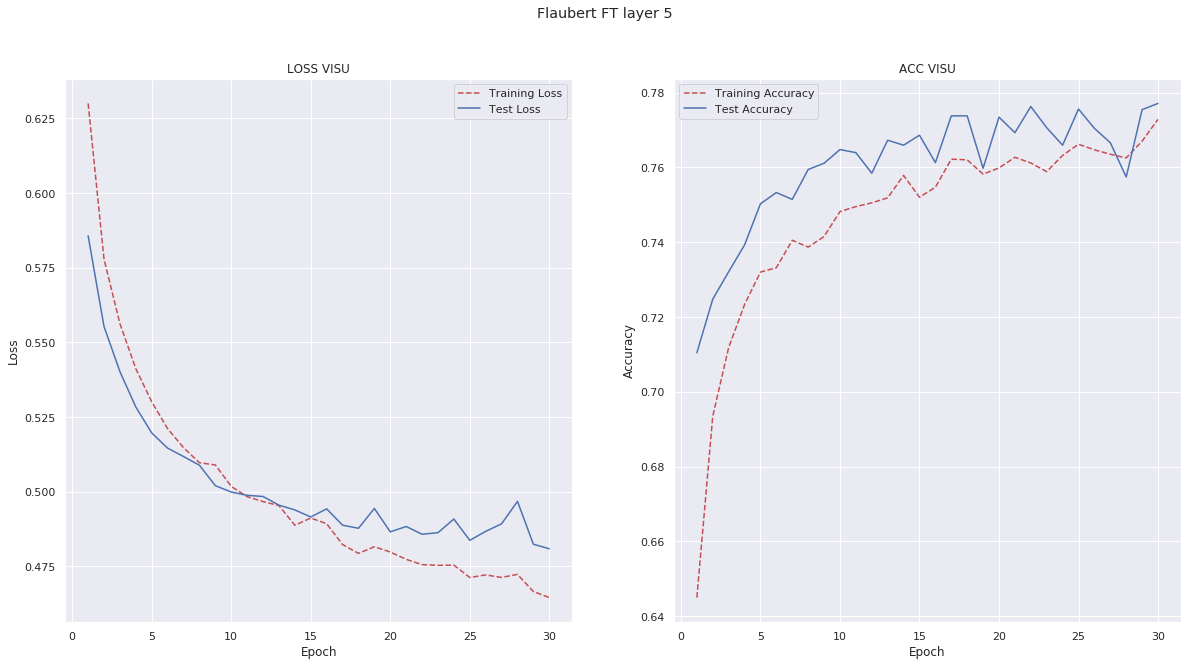

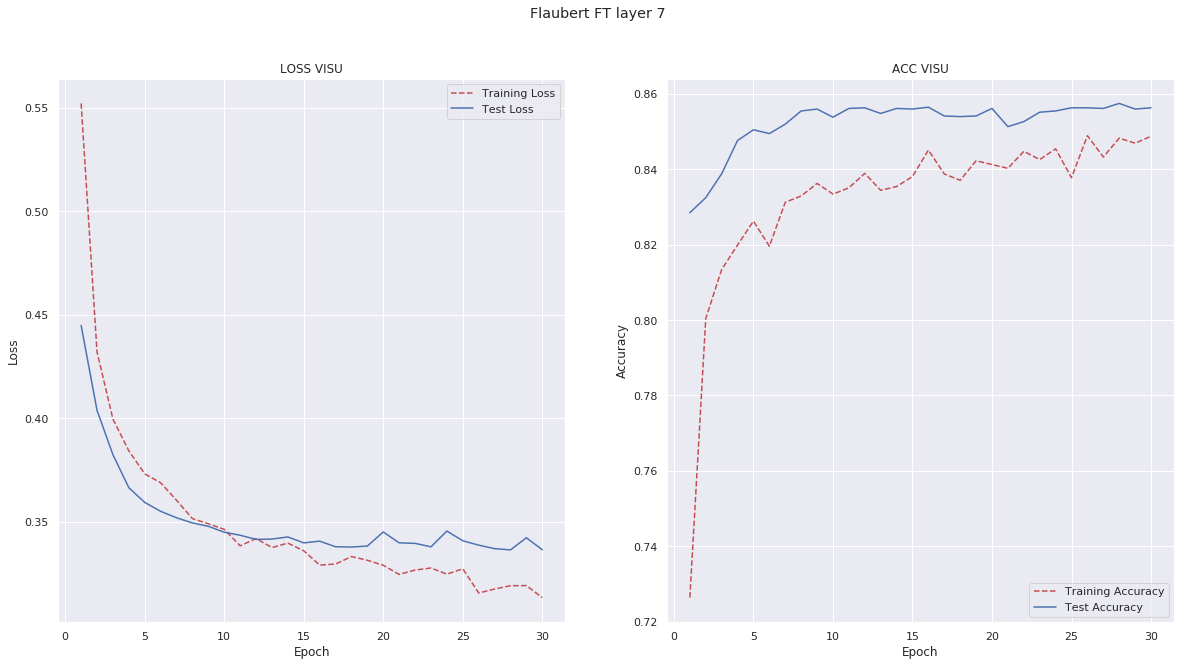

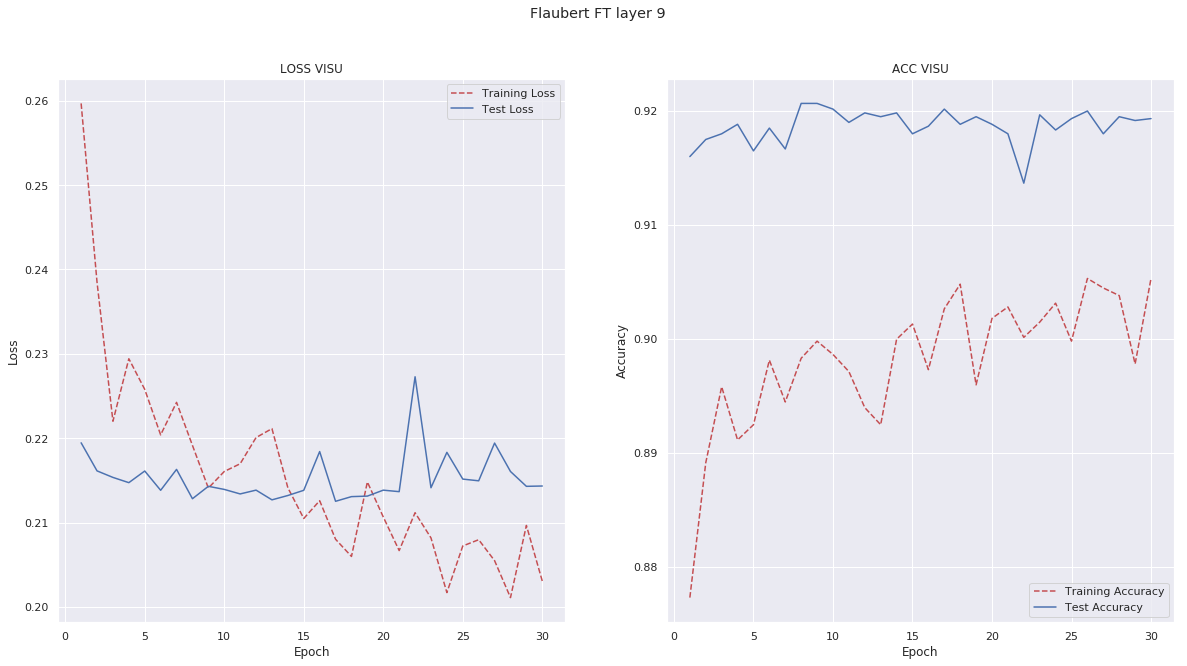

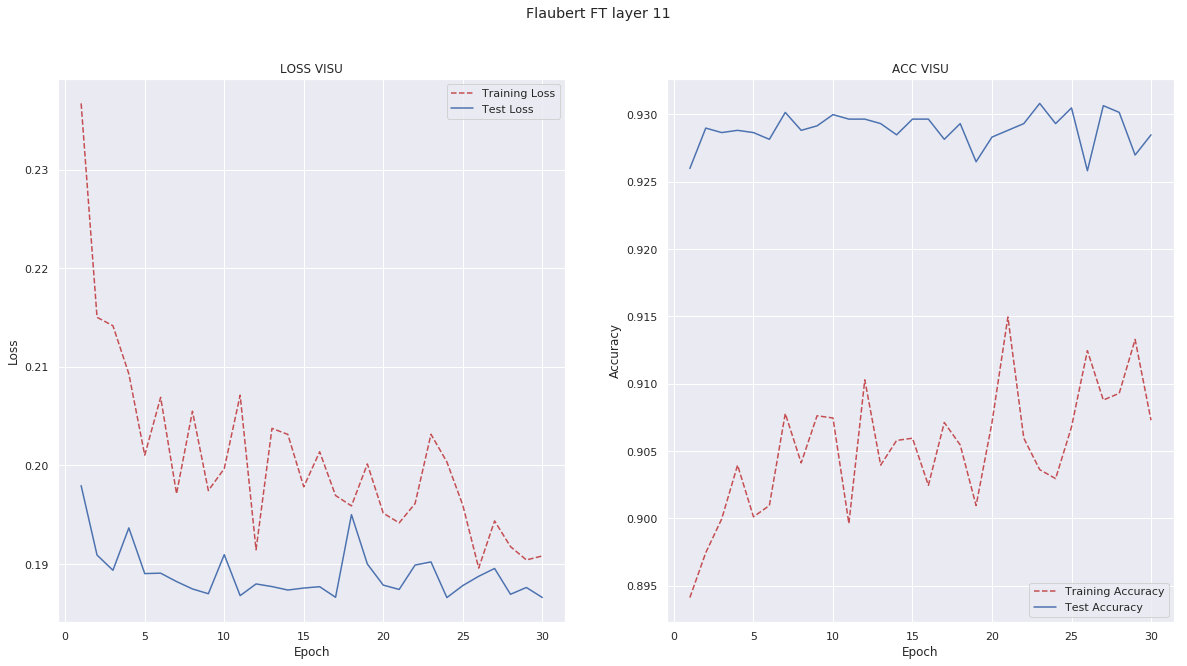

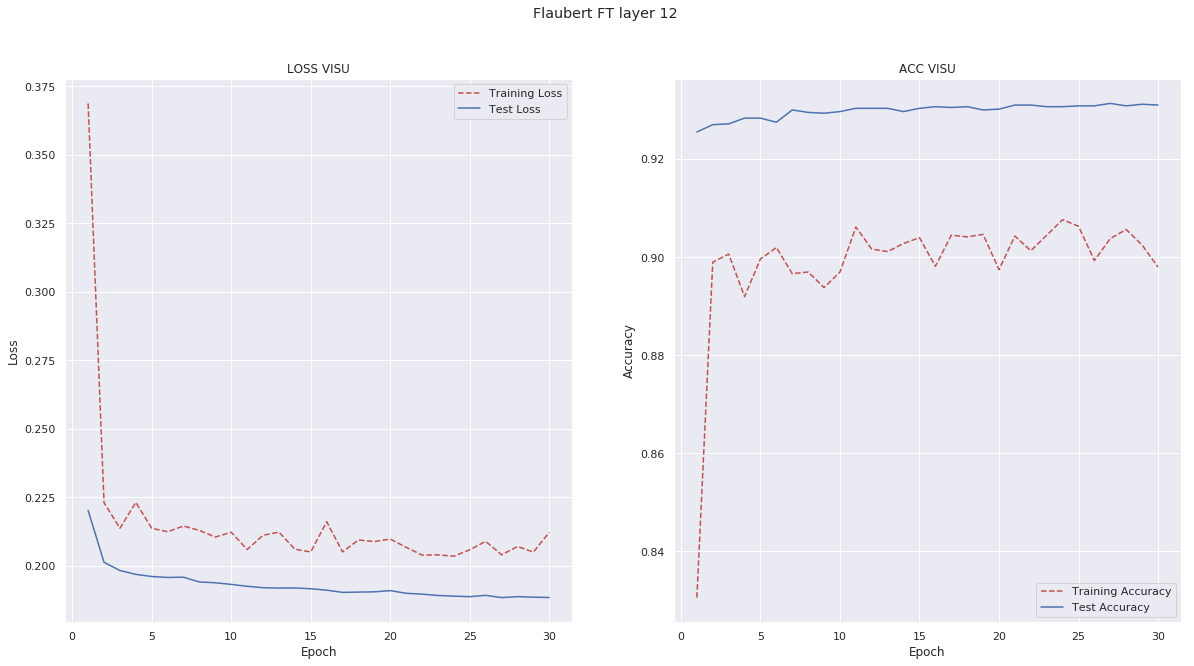

In [24]:
# models creations
model_fl_f_5, fig_5, acc_5 = class_head(x_train=train_array_5, y_train=train_label, x_test=test_array_5,
                                        y_test=test_label, title="Flaubert FT layer 5")
plt.show()
model_fl_f_7, fig_7, acc_7 = class_head(train_array_7, train_label, test_array_7, test_label,
                                        title="Flaubert FT layer 7")
plt.show()
model_fl_f_9, fig_9, acc_9 = class_head(train_array_9, train_label, test_array_9, test_label,
                                        title="Flaubert FT layer 9")
plt.show()
model_fl_f_11, fig_11, acc_11 = class_head(train_array_11, train_label, test_array_11, test_label,
                                           title="Flaubert FT layer 11")
plt.show()
model_fl_f_12, fig_12, acc_12 = class_head(train_array_12, train_label, test_array_12, test_label, lr=0.0001,
                                           title="Flaubert FT layer 12")
plt.show()

treillis[1, 0] = acc_5
treillis[1, 1] = acc_7
treillis[1, 2] = acc_9
treillis[1, 3] = acc_11
treillis[1, 4] = acc_12

### CamemBERT (RAW)

In [25]:
with open('numpy_save/camembert_raw.npy', 'rb') as f:
    train_array_5 = np.load(f)
    train_array_7 = np.load(f)
    train_array_9 = np.load(f)
    train_array_11 = np.load(f)
    train_array_12 = np.load(f)

    test_array_5 = np.load(f)
    test_array_7 = np.load(f)
    test_array_9 = np.load(f)
    test_array_11 = np.load(f)
    test_array_12 = np.load(f)

    train_label = np.load(f)
    test_lab = np.load(f)

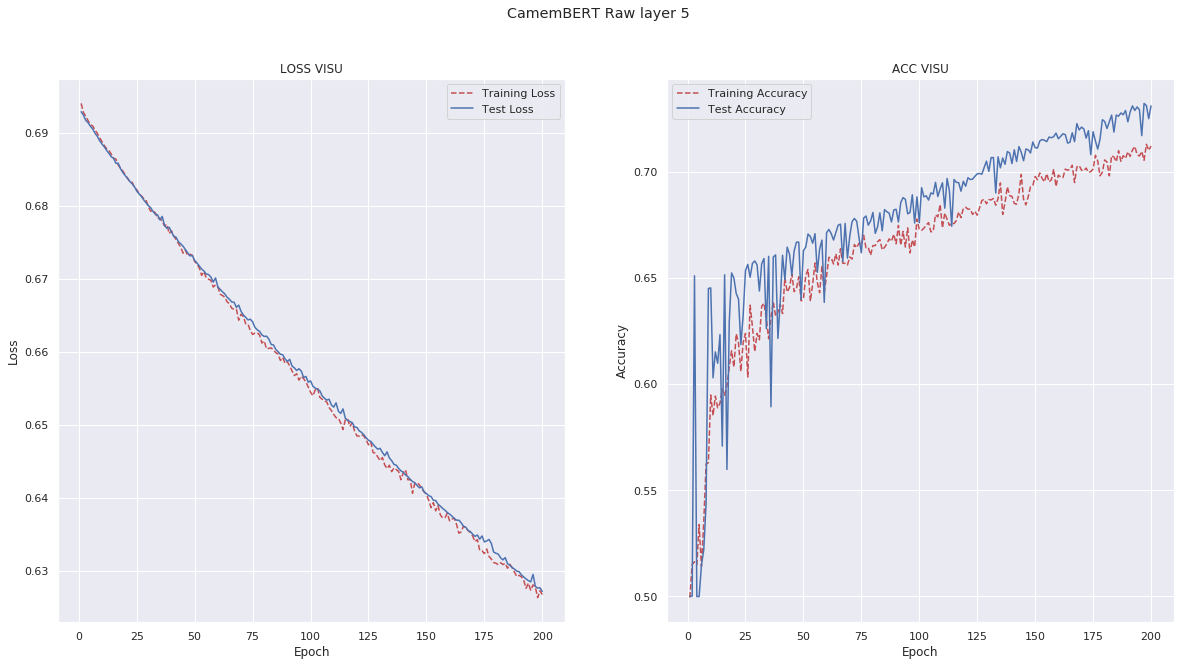

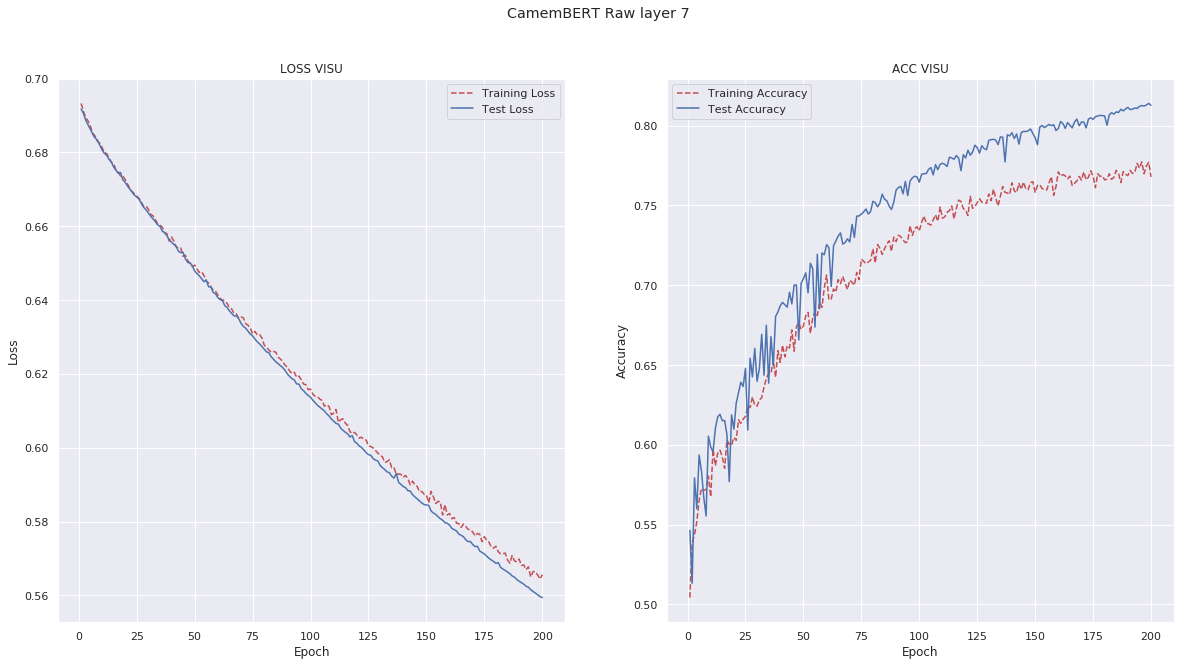

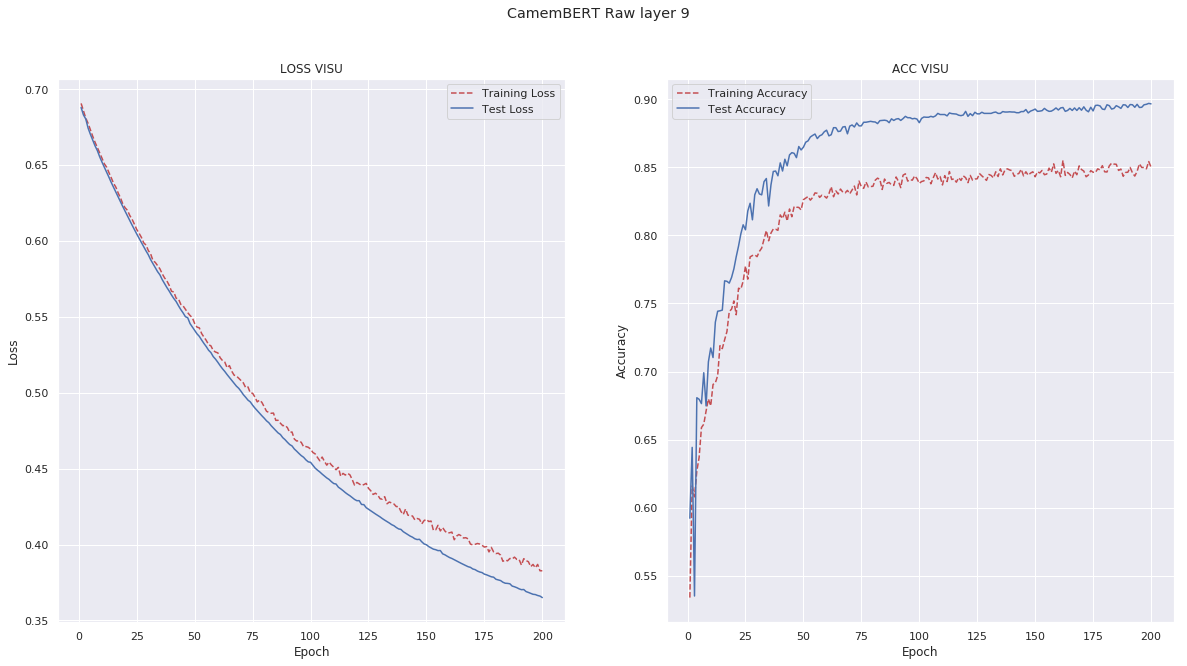

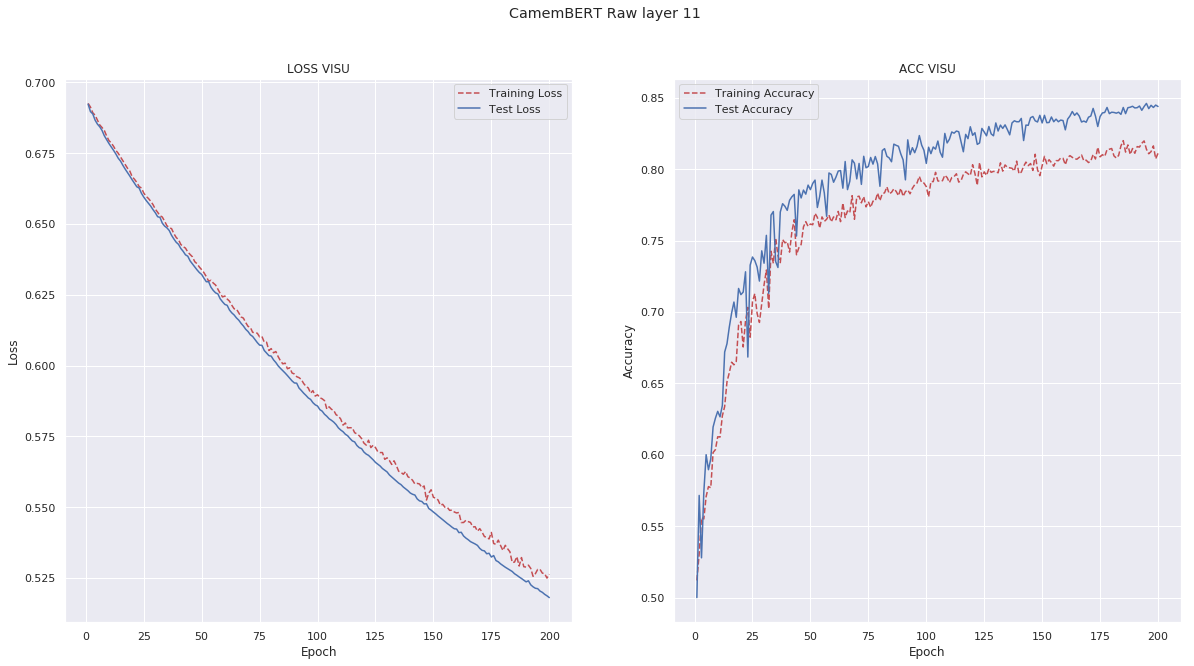

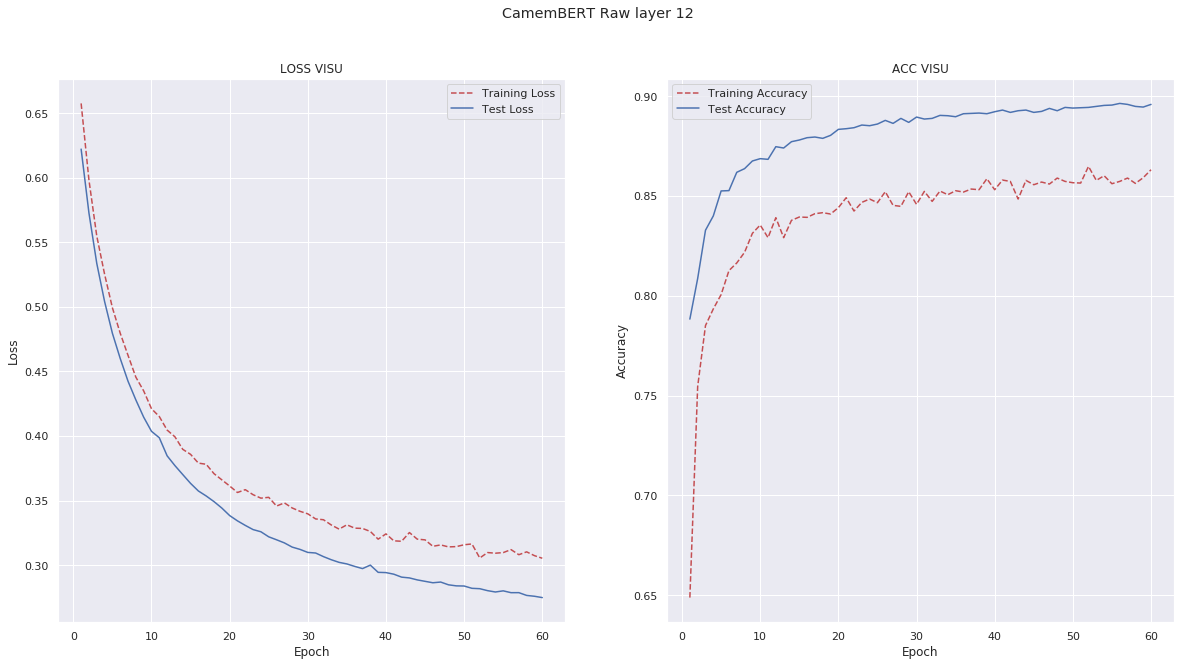

In [26]:
# models creations
model_cb_r_5, fig_5, acc_5 = class_head(x_train=train_array_5, y_train=train_label, x_test=test_array_5, n=200,
                                        y_test=test_label, title="CamemBERT Raw layer 5")
plt.show()
model_cb_r_7, fig_7, acc_7 = class_head(train_array_7, train_label, test_array_7, test_label, n=200,
                                        title="CamemBERT Raw layer 7")
plt.show()
model_cb_r_9, fig_9, acc_9 = class_head(train_array_9, train_label, test_array_9, test_label, n=200,
                                        title="CamemBERT Raw layer 9")
plt.show()
model_cb_r_11, fig_11, acc_11 = class_head(train_array_11, train_label, test_array_11, test_label, n=200,
                                           title="CamemBERT Raw layer 11")
plt.show()
model_cb_r_12, fig_12, acc_12 = class_head(train_array_12, train_label, test_array_12, test_label, n=60,
                                           title="CamemBERT Raw layer 12")
plt.show()

treillis[2, 0] = acc_5
treillis[2, 1] = acc_7
treillis[2, 2] = acc_9
treillis[2, 3] = acc_11
treillis[2, 4] = acc_12

### CamemBERT (fine-tuned)

In [27]:
with open('numpy_save/camembert_ft.npy', 'rb') as f:
    train_array_5 = np.load(f)
    train_array_7 = np.load(f)
    train_array_9 = np.load(f)
    train_array_11 = np.load(f)
    train_array_12 = np.load(f)

    test_array_5 = np.load(f)
    test_array_7 = np.load(f)
    test_array_9 = np.load(f)
    test_array_11 = np.load(f)
    test_array_12 = np.load(f)

    train_label = np.load(f)
    test_lab = np.load(f)

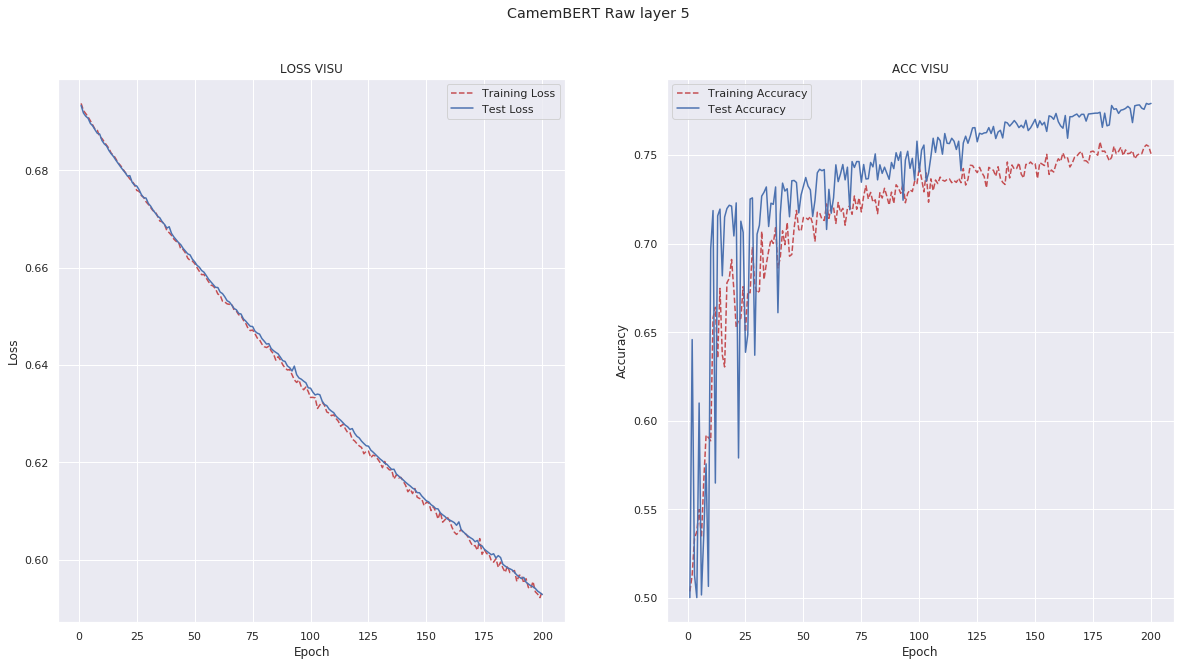

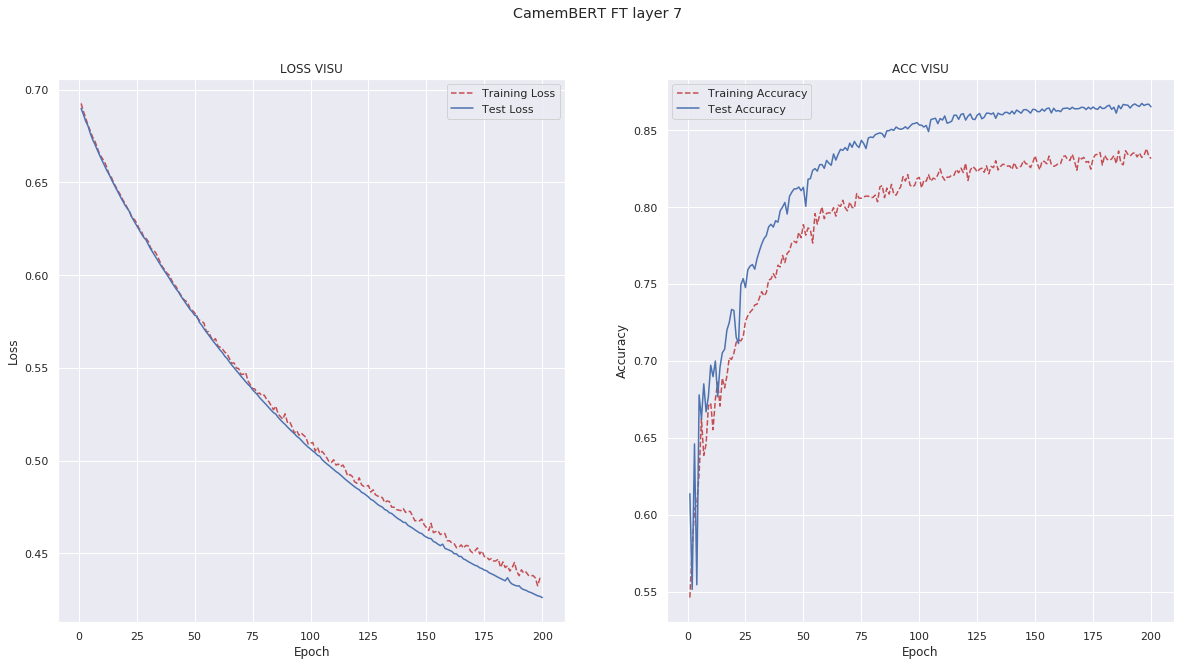

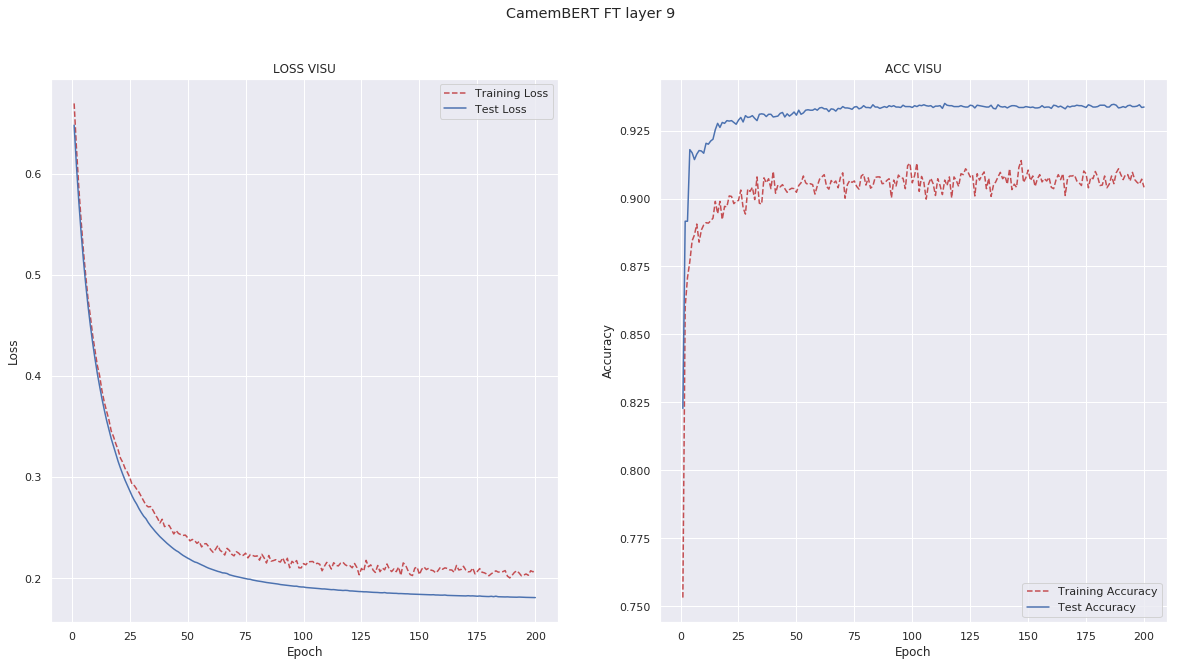

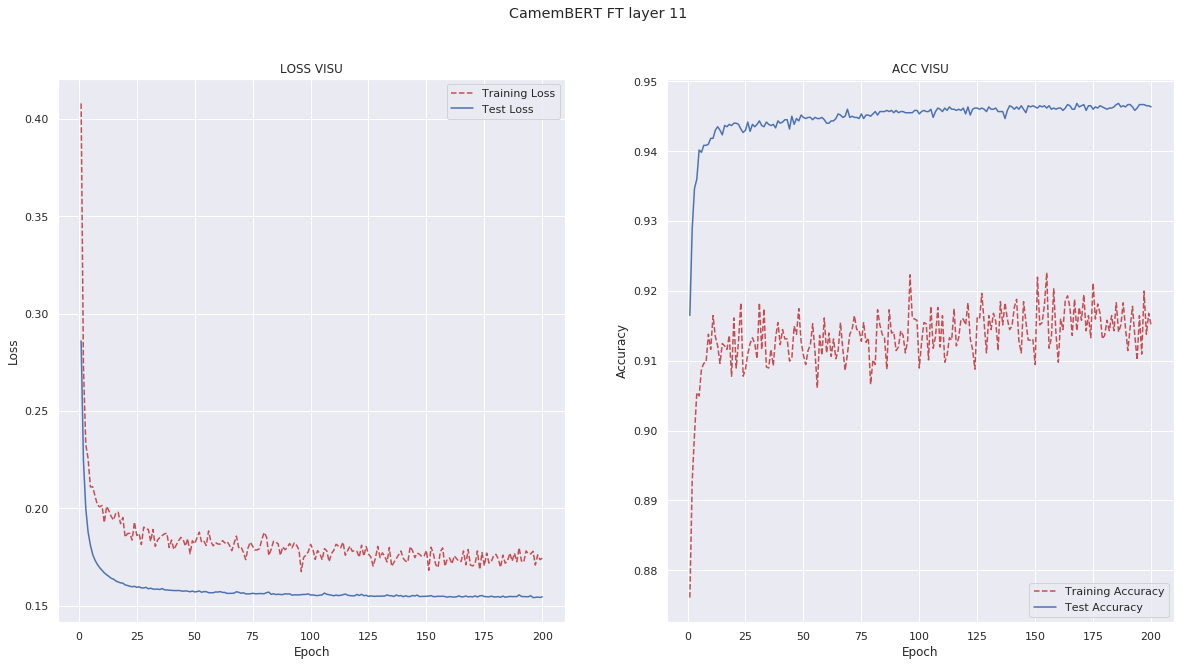

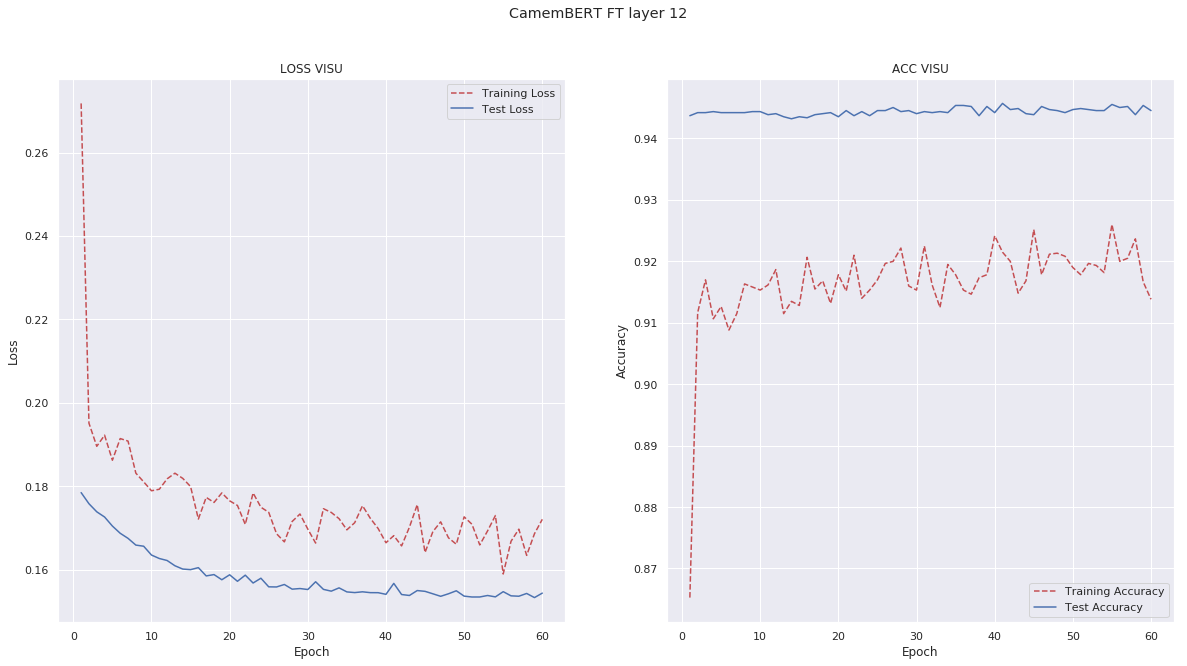

In [28]:
# models creations
model_cb_r_5, fig_5, acc_5 = class_head(x_train=train_array_5, y_train=train_label, x_test=test_array_5, n=200,
                                        y_test=test_label, title="CamemBERT Raw layer 5")
plt.show()
model_cb_r_7, fig_7, acc_7 = class_head(train_array_7, train_label, test_array_7, test_label, n=200,
                                        title="CamemBERT FT layer 7")
plt.show()
model_cb_r_9, fig_9, acc_9 = class_head(train_array_9, train_label, test_array_9, test_label, n=200,
                                        title="CamemBERT FT layer 9")
plt.show()
model_cb_r_11, fig_11, acc_11 = class_head(train_array_11, train_label, test_array_11, test_label, n=200,
                                           title="CamemBERT FT layer 11")
plt.show()
model_cb_r_12, fig_12, acc_12 = class_head(train_array_12, train_label, test_array_12, test_label, n=60,
                                           title="CamemBERT FT layer 12")
plt.show()

treillis[3, 0] = acc_5
treillis[3, 1] = acc_7
treillis[3, 2] = acc_9
treillis[3, 3] = acc_11
treillis[3, 4] = acc_12

In [29]:
treillis

array([[0.69761628, 0.7139523 , 0.71945322, 0.72762126, 0.7297883 ],
       [0.77712953, 0.85630941, 0.91931987, 0.92848808, 0.93098849],
       [0.73095518, 0.81280214, 0.89664942, 0.84380728, 0.89581597],
       [0.77912986, 0.86514419, 0.93365562, 0.94632441, 0.94449073]])

### Treillis visu

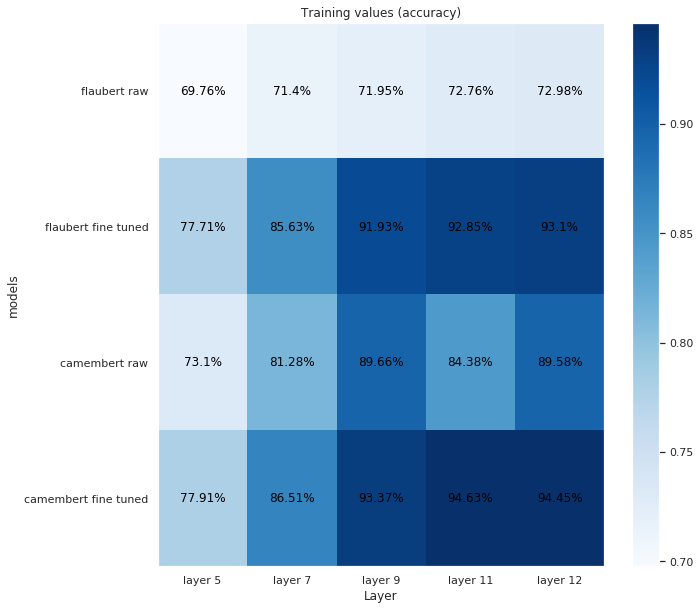

In [30]:
def visu_treillis(treillis) :

    fig = plt.figure(figsize=(10,10))

    plt.imshow(treillis , aspect = 'auto',cmap='Blues')
    txt = "Training values (accuracy)"
    plt.title(txt)
    y_label_list = ["flaubert raw" , "flaubert fine tuned" , "camembert raw" , "camembert fine tuned"]
    x_label_list = ["layer 5" , "layer 7" , "layer 9" , "layer 11" , "layer 12"]
    plt.xlabel('Layer')
    plt.ylabel('models')
    ax = plt.gca()

    ax.set_xticks(range(5))
    ax.set_yticks(range(4))

    ax.set_xticklabels(x_label_list)
    ax.set_yticklabels(y_label_list)

    for x_index in range(5) :
        for y_index in range(4) :
            label = str(np.round(100*treillis[y_index,x_index] , 2)) + "%"
            plt.text(x_index, y_index, label, color= 'black', ha='center', va='center')

    # don't show the grid
    plt.grid()
    plt.colorbar()

    return fig

fig = visu_treillis(treillis)